In [159]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
import tqdm
from collections import deque

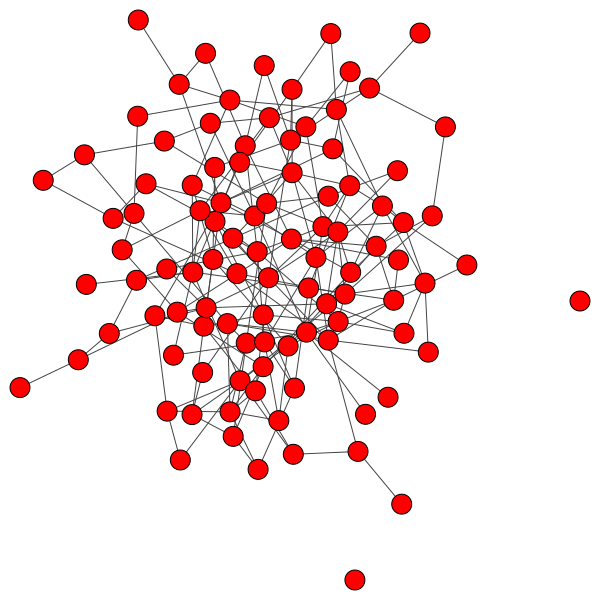

In [160]:
g = ig.Graph.Erdos_Renyi(n=100, m=200)
layout = g.layout_drl()
ig.plot(g, "graph.png")

In [161]:
adj_matrix = np.array(g.get_adjacency().data)

In [164]:
samples = adj_matrix[:20, :20]

In [165]:
samples

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [166]:
def convert_to_adjustency_list(adj_matrix):
    adjList = dict()
    for i in range(len(adj_matrix)):
        adjList[i] = list(np.argwhere(adj_matrix[i] == 1).flatten().tolist())
    return adjList

In [167]:
convert_to_adjustency_list(sample)

{0: [],
 1: [],
 2: [],
 3: [],
 4: [11],
 5: [6],
 6: [5],
 7: [],
 8: [],
 9: [19],
 10: [15],
 11: [4],
 12: [],
 13: [],
 14: [],
 15: [10],
 16: [],
 17: [18],
 18: [17],
 19: [9]}

In [174]:
def dfs(node, component):
    # marking node as visited.
    visited[node] = True

    # appending node in the component list
    component.append(node)
    # visiting neighbours of the current node
    for neighbour in adj_list[node]:
        # if the node is not visited then we call dfs on that node.
        if visited[neighbour] == False:
            dfs(neighbour, component)

adj_list = convert_to_adjustency_list(adj_matrix)
visited = [False for i in range(len(adj_matrix))]
all_components = []

for i in range(len(adj_list)):
    if visited[i] == False:
        component = []
        dfs(i, component)
        all_components.append(component)

In [180]:
len(all_components)

3

In [188]:
collor_map = {0: "blue", 1:"red", 2: "yellow"}

In [191]:
vertices_map = [(v, collor_map[]) for x in collor_map for v in all_components[x]]

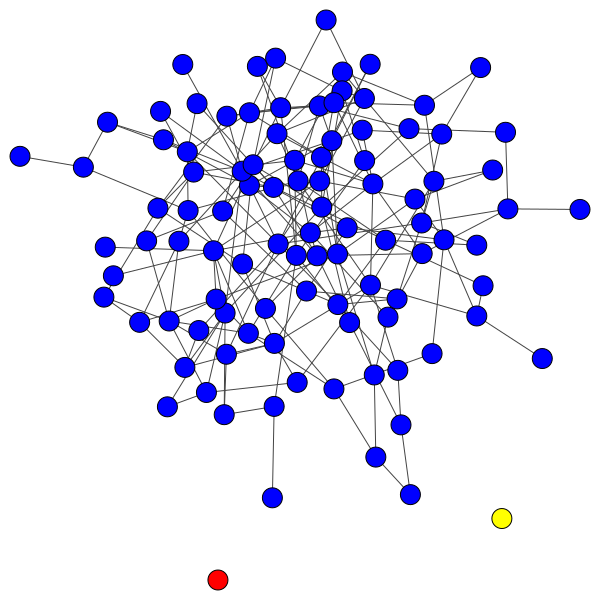

In [198]:
vertices_map = [(v, collor_map[]) for x in collor_map for v in all_components[x]]
i = g.community_infomap()
pal = ig.drawing.colors.ClusterColoringPalette(len(i))
g.vs['mcolor'] = list(map(lambda x: x[1], sorted(vertices_map, key=lambda x: x[0])))
ig.plot(g, "graph_components.png")

In [176]:
def bfs(start, end, adj_list):
  queue = deque([start])
  track = dict()
  visited = set()
  flag = False
  while queue:
    v = queue.popleft()
    for w in adj_list[v]:
      if w not in visited:
        queue.append(w)
        visited.add(w)
        track[w] = v
        if w == end:
          flag = True
    if flag:
      break
  return track, flag

In [199]:
start_point = np.random.randint(0, len(adj_list))
end_point = np.random.randint(0, len(adj_list))

track, found = bfs(start_point, end_point, adj_list)

In [201]:
def get_path(start_point, end_point, track):
  path = [end_point]
  v = end_point

  while v != start_point:
      path.append(track[v])
      v = track[v]
      
  path = list(reversed(path))
  return path

In [211]:
experiments = dict()

In [212]:
for x in range(100):
  start_point = np.random.randint(0, len(adj_list))
  end_point = np.random.randint(0, len(adj_list))

  track, found = bfs(start_point, end_point, adj_list)
  if found:
    path = get_path(start_point, end_point, track)
    experiments[(start_point, end_point)] = path
  else:
    experiments[(start_point, end_point)] = []

In [220]:
import pandas as pd

In [223]:
df = pd.DataFrame({"routes": list(experiments.values())})

In [225]:
df['routes_len'] = df['routes'].map(lambda x: len(x))

In [232]:
df[df['routes_len'] == 7]

,routes,routes_len
65,"[21, 37, 80, 32, 34, 28, 20]",7


In [228]:
experiments[(start_point, end_point)]

[89, 10, 38, 91]

In [233]:
path = experiments[(21, 20)]

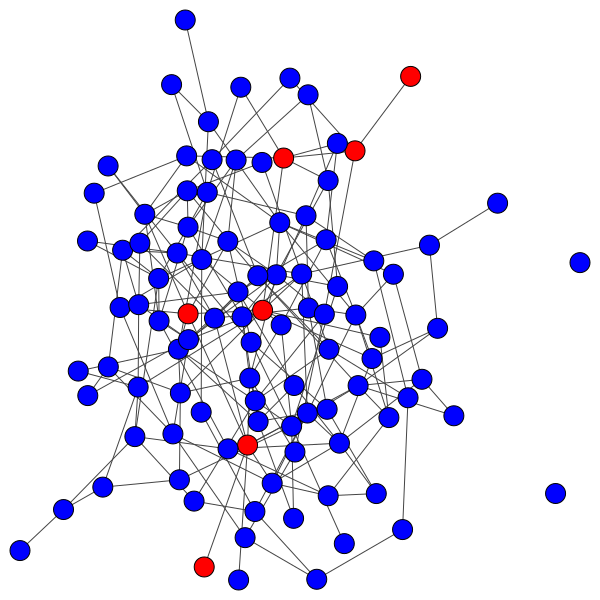

In [235]:
i = g.community_infomap()
g.vs['color'] = list(map(lambda x: "blue" if x not in path else "red", list(range(len(adj_list)))))
ig.plot(g, "bfs.png")